In [1]:
import pandas as pd
DATA=pd.read_csv(r"C:\\Users\Ogeid99\Desktop\cataloguess\DATA_no_modify.csv")
DATA

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,79,1985-01-02T22:57:43.090000,41.7150,13.9410,5.8,BULLETIN-VAX,NaN,NaN,NaN,Md,2.6,--,6 km S Civitella Alfedena (AQ)
1,89,1985-01-03T00:46:16.990000,41.6770,13.9310,6.1,BULLETIN-VAX,NaN,NaN,NaN,Md,2.5,--,6 km NE Picinisco (FR)
2,199,1985-01-04T16:57:40.240000,46.1580,7.1740,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.8,--,Confine Italia-Svizzera (SVIZZERA)
3,229,1985-01-04T23:59:54.820000,45.3380,6.6410,5.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.7,--,Confine Italia-Francia (FRANCIA)
4,239,1985-01-05T03:47:03.640000,45.4090,6.6270,10.0,BULLETIN-VAX,NaN,NaN,NaN,M,3.2,--,Confine Italia-Francia (FRANCIA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181772,24334191,2020-04-29T11:17:24.170000,45.9167,12.1917,10.1,SURVEY-INGV,NaN,NaN,NaN,ML,1.7,--,2 km SW Refrontolo (TV)
181773,24335541,2020-04-29T14:14:47.970000,38.4090,13.5617,28.2,SURVEY-INGV,NaN,NaN,NaN,ML,2.3,--,Costa Siciliana centro-settentrionale (Palermo)
181774,24336421,2020-04-29T16:23:40.010000,42.8882,13.0363,10.0,SURVEY-INGV,NaN,NaN,NaN,ML,1.8,--,1 km N Preci (PG)
181775,24336481,2020-04-29T16:30:14.850000,37.7683,14.6293,38.0,SURVEY-INGV,NaN,NaN,NaN,ML,2.2,--,3 km SE Troina (EN)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
DATA=DATA.sort_values(by='Time')
counter=pd.Series([1 for i in range(len(DATA['Time']))])
counter.name='Count'
b=pd.concat([DATA,pd.Series(counter)],axis=1)
tim=b['Count'].groupby(b['Time'])
tim_sum=pd.Series(tim.sum())
DATA['Time']=pd.to_datetime(DATA['Time'])
#time_plot=[ z.strftime('%Y-%m-%d') for z in DATA['Time']]
#sns.distplot(b_sum,kde=False) # frequency of earthquakes per count
#b_sum.index().tolist(b_sum)
dt = datetime.utcnow() 
dt64 = np.datetime64(dt)
time_new=[]
for i in DATA['Time']:
    ts = (dt64 - np.datetime64(i)) / np.timedelta64(1, 's')
    times=datetime.utcfromtimestamp(ts)
    time_new.append(times)


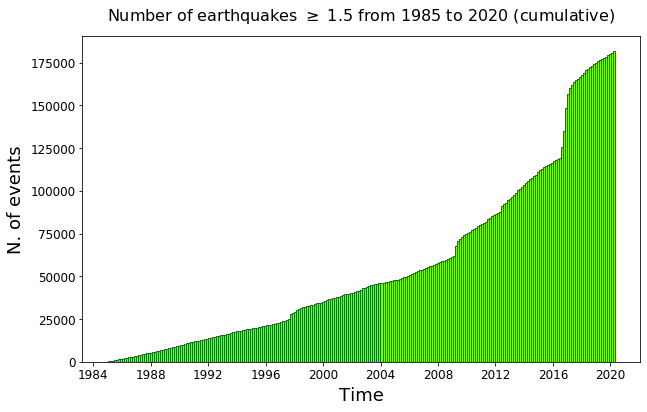

In [5]:
DATA['Time']=time_new

tim_sum_index=tim_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(DATA['Time'],edgecolor='green',color='lawngreen',cumulative=True,bins=253) #edgecolor: bar color
plt.xlabel('Time',fontsize=18,labelpad=5)
plt.ylabel('N. of events',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 from 1985 to 2020 (cumulative)',fontsize=16,pad=15.0)   
plt.tick_params(labelsize=12)
#plt.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-time_cumulative.png",bbox_inches='tight',dpi=600)

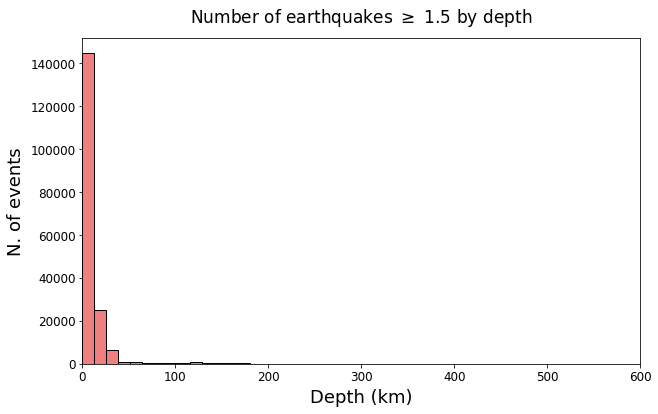

In [7]:
dep=b['Count'].groupby(b['Depth/Km'])
dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=50) #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('N. of events',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=17,pad=15.0)  
plt.tick_params(labelsize=12)
plt.xlim(0,600)
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth.png",bbox_inches='tight',dpi=600)

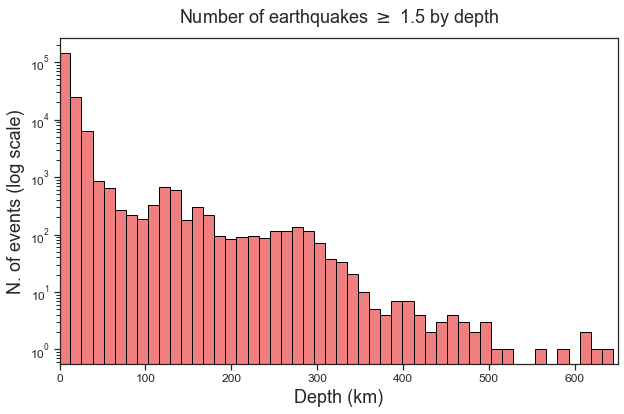

In [10]:
dep=b['Count'].groupby(b['Depth/Km'])
dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=50) #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('N. of events (log scale)',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=18,pad=15.0)  
plt.tick_params(labelsize=12)
plt.xlim(0,650)
plt.yscale('log')
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth_logscale.png",bbox_inches='tight',dpi=600)

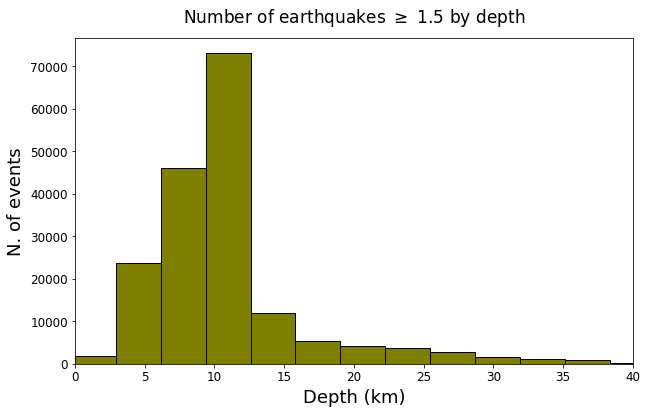

In [14]:
dep=b['Count'].groupby(b['Depth/Km'])
dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(b['Depth/Km'],edgecolor='black', color='olive',bins=200) #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('N. of events',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=17,pad=15.0)  
plt.tick_params(labelsize=12)
plt.xlim(0,40)
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth_min40_big.png",bbox_inches='tight',dpi=600)

(0, 500)

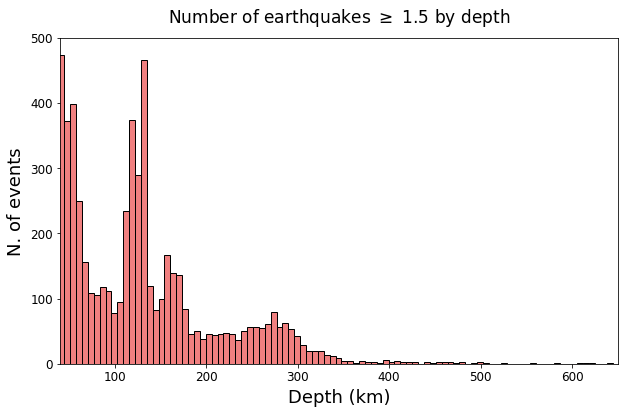

In [18]:
dep=b['Count'].groupby(b['Depth/Km'])
dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(b['Depth/Km'],edgecolor='black' ,color='lightcoral',bins=100) #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('N. of events',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=17,pad=15.0)  
plt.tick_params(labelsize=12)
plt.xlim(40,650)
plt.ylim(0,500)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth_greater40.png",bbox_inches='tight',dpi=600)

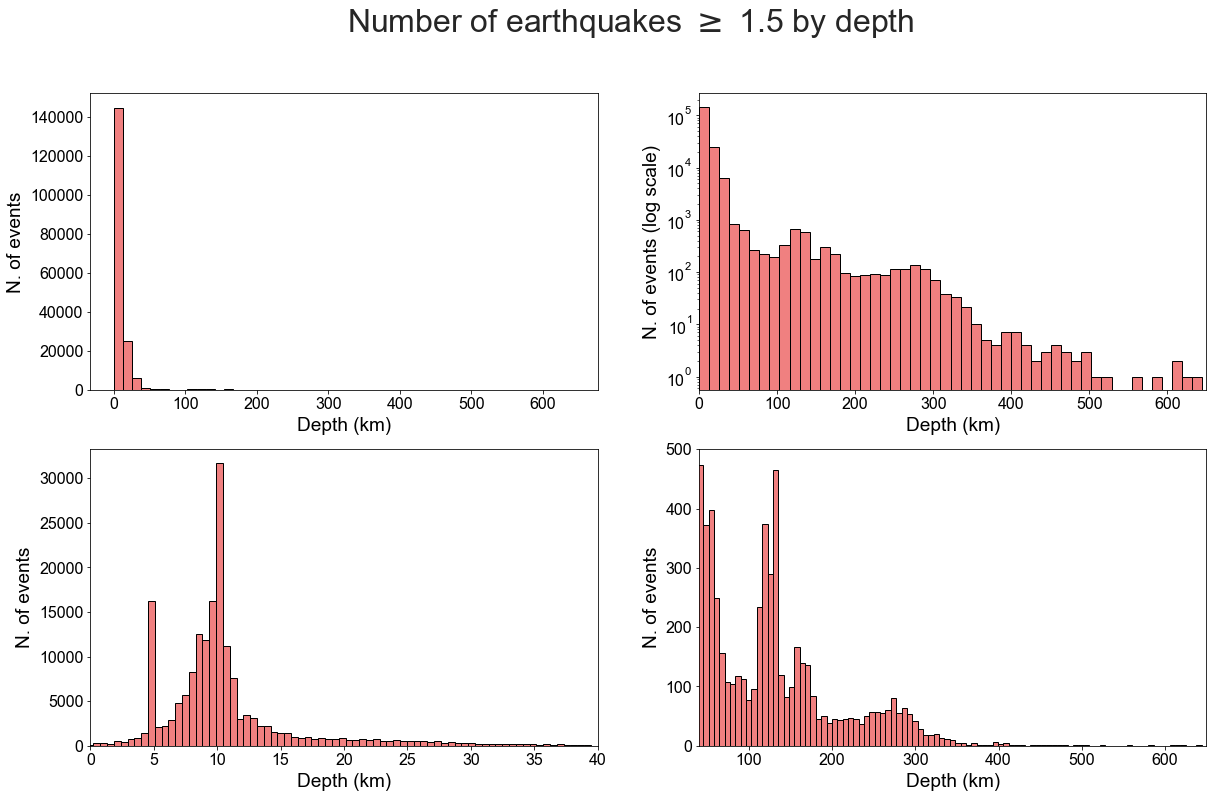

In [7]:
fig,axes=plt.subplots(2,2,figsize=(20,12))
sns.set(style="ticks", palette="pastel")
fig.suptitle('Number of earthquakes $\geq$ 1.5 by depth',fontsize=32)
# Draw a nested boxplot 
axes[0][0].hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=50)
axes[1][0].hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=1200)
axes[0][1].hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=50)
axes[1][1].hist(b['Depth/Km'],edgecolor='black', color='lightcoral',bins=100)
#plt.hist(DATA['Time'],ax=axes[0][])
for i in range(2):
    for j in range(2):
        ax = axes[i,j]
        if i == 0 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16) #change labelsize
        elif i == 1 and j==0:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(0,40)
        elif i == 0 and j==1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events (log scale)',fontsize=19,labelpad=5)
            ax.set_yscale('log')
            ax.set_xlim(0,650)
            ax.tick_params(labelsize=16)
        elif i==1 and j == 1:
            ax.set_xlabel('Depth (km)',fontsize=19,labelpad=5)
            ax.set_ylabel('N. of events',fontsize=19,labelpad=5)
            ax.tick_params(labelsize=16)
            ax.set_xlim(40,650)
            ax.set_ylim(0,500)
#ax1.title.set_text('First Plot') title of the first plot
#comment this histograms
fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\united_numberofearthuqakesbydepth.png",bbox_inches='tight',dpi=600)

(0, 40)

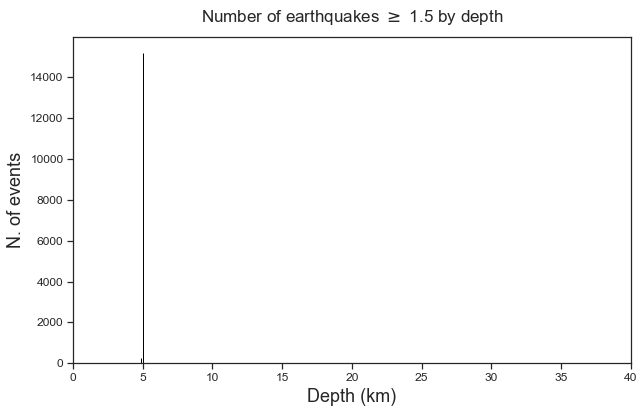

In [17]:
dm=DATA[(DATA['Depth/Km']<5.1) & (DATA['Depth/Km']>4.8)]
dep=b['Count'].groupby(b['Depth/Km'])
dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.hist(dm['Depth/Km'],edgecolor='black', color='lightcoral',bins=1200) #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('N. of events',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=17,pad=15.0)  
plt.tick_params(labelsize=12)
plt.xlim(0,40)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth_min40.png",bbox_inches='tight',dpi=600)

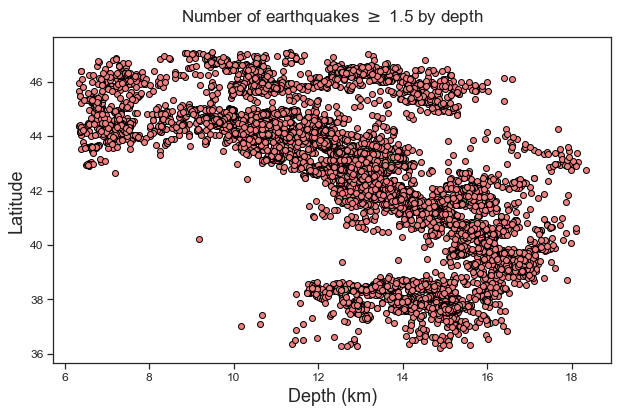

In [25]:

dep_sum=pd.Series(dep.sum())
dep_sum_index=dep_sum.index.values
fig,axes=plt.subplots(1,1,figsize=(10,6))
plt.scatter(dm['Longitude'],dm['Latitude'],edgecolor='black', color='lightcoral') #edgecolor: bar color
plt.xlabel('Depth (km)',fontsize=18,labelpad=5)
plt.ylabel('Latitude',fontsize=18,labelpad=5)
plt.title('Number of earthquakes $\geq$ 1.5 by depth',fontsize=17,pad=15.0)  
plt.tick_params(labelsize=12)
#plt.xlim(0,40)
#fig.savefig(r"C:\\Users\Ogeid99\Desktop\tesi\photos_thesis\grafici_finali_jupyter\number_of_events-depth_min40.png",bbox_inches='tight',dpi=600)

In [20]:
dm

,#EventID,Time,Latitude,Longitude,Depth/Km,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
181362,24203291,2020-04-03 11:27:36.567044,39.0410,17.1492,5.0,SURVEY-INGV,NaN,NaN,NaN,ML,1.7,--,5 km SE Crotone (KR)
181272,24182571,2020-03-30 14:01:48.547044,37.5205,14.9428,5.0,SURVEY-INGV,NaN,NaN,NaN,ML,1.6,--,3 km W Motta Sant'Anastasia (CT)
181033,24102101,2020-03-15 04:33:23.617044,38.3467,14.5928,4.9,SURVEY-INGV,NaN,NaN,NaN,ML,2.0,--,Costa Siciliana nord-orientale (Messina)
180839,24026721,2020-02-28 07:24:48.127044,43.5877,13.4577,4.9,SURVEY-INGV,NaN,NaN,NaN,ML,2.4,--,6 km SW Ancona (AN)
180037,23748701,2020-01-07 00:33:59.127044,41.8552,15.3332,4.9,SURVEY-INGV,NaN,NaN,NaN,ML,2.3,--,2 km W Lesina (FG)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,1269,1985-01-14 02:19:54.587044,40.7830,15.4010,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,2.9,--,3 km W Castelgrande (PZ)
35,1109,1985-01-11 21:24:15.447044,43.4090,12.4840,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,2.6,--,5 km SE Pietralunga (PG)
34,1099,1985-01-11 20:30:52.517044,37.4040,14.4430,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.3,--,2 km SW Aidone (EN)
10,489,1985-01-06 17:23:14.527044,39.2910,16.7650,5.0,BULLETIN-VAX,NaN,NaN,NaN,Md,3.0,--,2 km N Castelsilano (KR)
